Shubham Jaysukhbhai Kothiya

### A4: Analysis of Johns Hopkins APL - Parker Solar Probe - Whistler Mode Waves 2


In [25]:
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "./4_PSPWhistler Mode W2.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)
librosa.load(audio_data, sr=44100)

<class 'numpy.ndarray'> <class 'int'>
(308700,) 22050


(array([-0.0015847 , -0.00704776, -0.01335788, ...,  0.00042864,
         0.00049548,  0.0003892 ], dtype=float32),
 44100)

In [26]:
import IPython.display as ipd
ipd.Audio(audio_data)

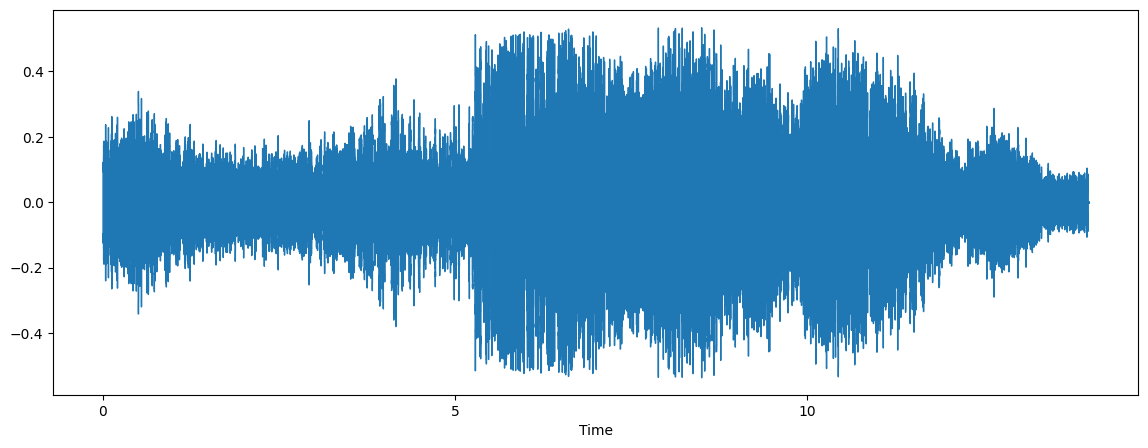

In [27]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [28]:
# Build a simple chroma filter bank
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)
# Use quarter-tones instead of semitones
librosa.filters.chroma(sr=22050, n_fft=4096, n_chroma=24)
# Equally weight all octaves
librosa.filters.chroma(sr=22050, n_fft=4096, octwidth=None)

array([[3.06632757e-01, 2.43654341e-01, 1.60742402e-01, ...,
        2.75466492e-20, 2.33491276e-20, 1.97881458e-20],
       [3.00136745e-01, 2.74304509e-01, 2.27255851e-01, ...,
        6.61833761e-13, 5.80291837e-13, 5.08708906e-13],
       [2.90173739e-01, 3.00350249e-01, 2.96240419e-01, ...,
        2.91240070e-07, 2.64146166e-07, 2.39527623e-07],
       ...,
       [3.03631455e-01, 2.60380656e-01, 1.95162937e-01, ...,
        2.12708409e-16, 2.44482217e-16, 2.80916862e-16],
       [3.08412760e-01, 2.28293657e-01, 1.32887244e-01, ...,
        1.18539604e-24, 1.40935927e-24, 1.67509979e-24],
       [3.09425622e-01, 2.10499778e-01, 1.04831174e-01, ...,
        2.09995848e-29, 1.72074678e-29, 1.40981758e-29]], dtype=float32)

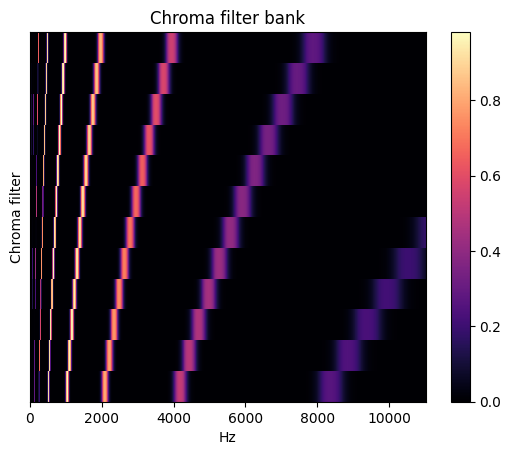

In [29]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

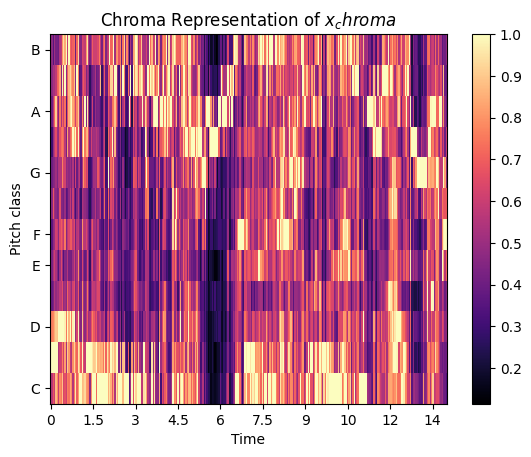

In [30]:
hop_length = 1024

x_chroma = librosa.feature.chroma_cqt(y=x, sr=sr,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=1, sharey=True)
img = librosa.display.specshow(x_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax)
ax.set(title='Chroma Representation of $x_chroma$')
fig.colorbar(img, ax=ax)

In [31]:
librosa.feature.chroma_stft(y=x, sr=sr)
# Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.32257566, 0.34398863, 0.3266352 , ..., 0.11605576, 0.09563018,
        0.07792281],
       [1.        , 1.        , 0.8831796 , ..., 0.11463696, 0.09300474,
        0.07551034],
       [0.54755694, 0.7674315 , 1.        , ..., 0.10699686, 0.09440511,
        0.10290454],
       ...,
       [0.04666682, 0.07155178, 0.20856269, ..., 0.49699193, 0.33350685,
        0.3440129 ],
       [0.11763694, 0.15161121, 0.20156594, ..., 1.        , 0.29390678,
        0.1763871 ],
       [0.1351394 , 0.19564214, 0.23107795, ..., 0.38635287, 0.22508387,
        0.23087306]], dtype=float32)

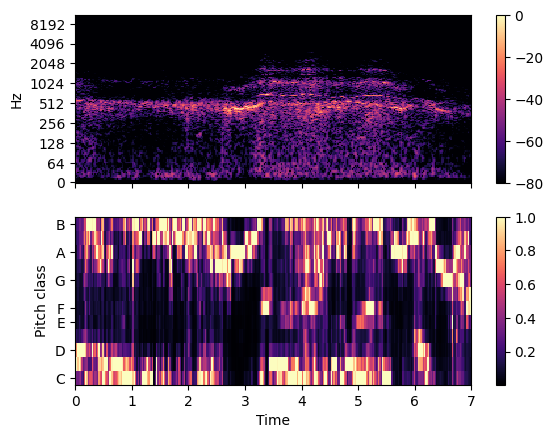

In [32]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

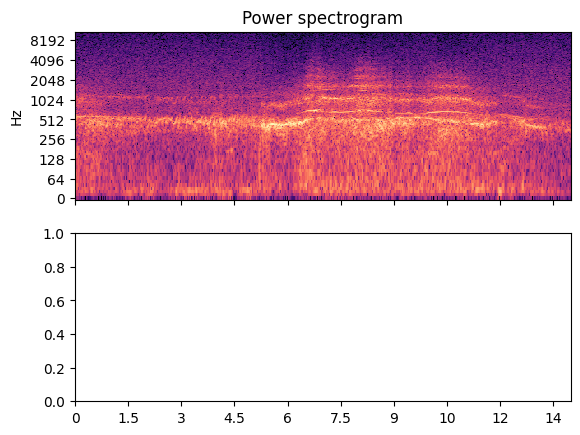

In [33]:
# librosa.onset.onset_strength
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

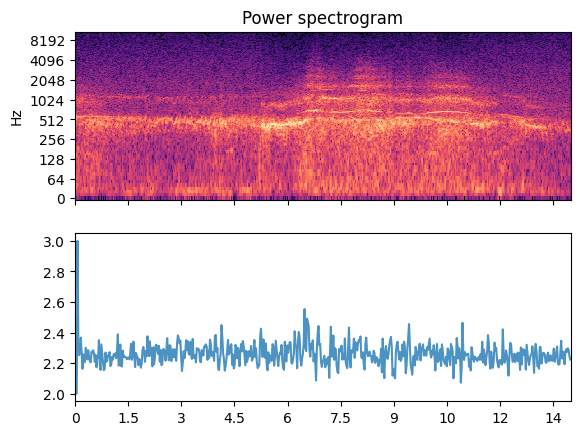

In [34]:
# Construct a standard onset function
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

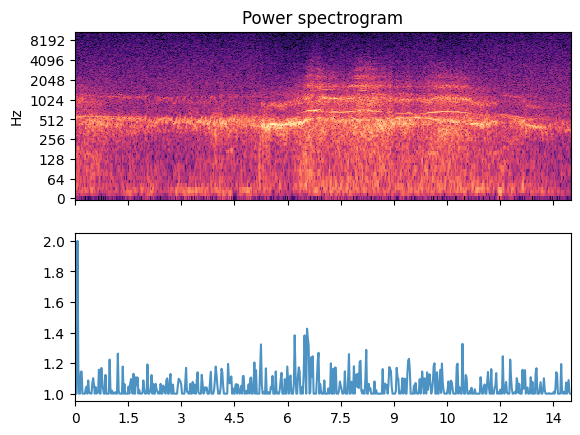

In [35]:
# Median aggregation, and custom mel options
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=x, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')

[Text(0, 0.5, 'Normalized strength'), []]

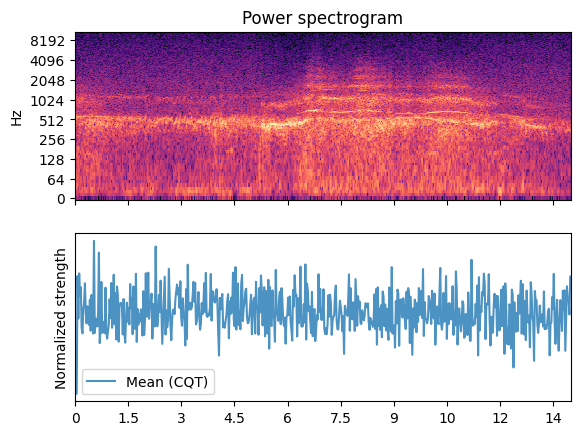

In [36]:
# Constant-Q spectrogram instead of Mel


D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()


C = np.abs(librosa.cqt(y=x, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8,
         label='Mean (CQT)')
ax[1].legend()
ax[1].set(ylabel='Normalized strength', yticks=[])

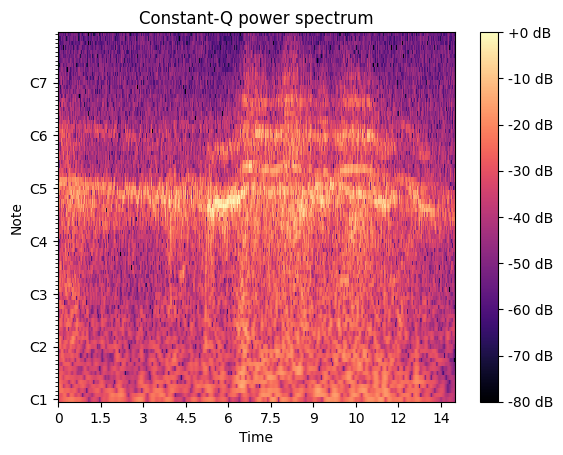

In [37]:
C = np.abs(librosa.cqt(x, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

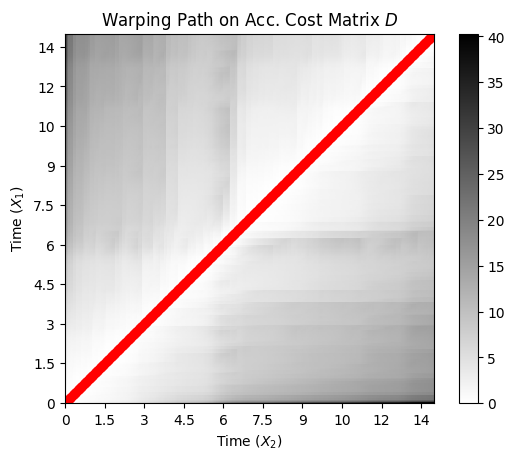

In [38]:
D, wp = librosa.sequence.dtw(X=x_chroma,Y=x_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=sr, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=sr,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
fig.colorbar(img, ax=ax)


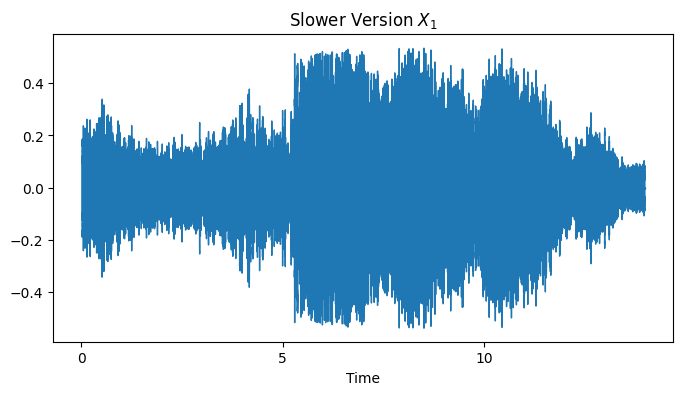

In [39]:
#Alternative Visualization in the Time Domain
fig, ax1 = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 4))

# Plot x_1
librosa.display.waveshow(x, sr=sr, ax=ax1)
ax1.set(title='Slower Version $X_1$')
ax1.label_outer()


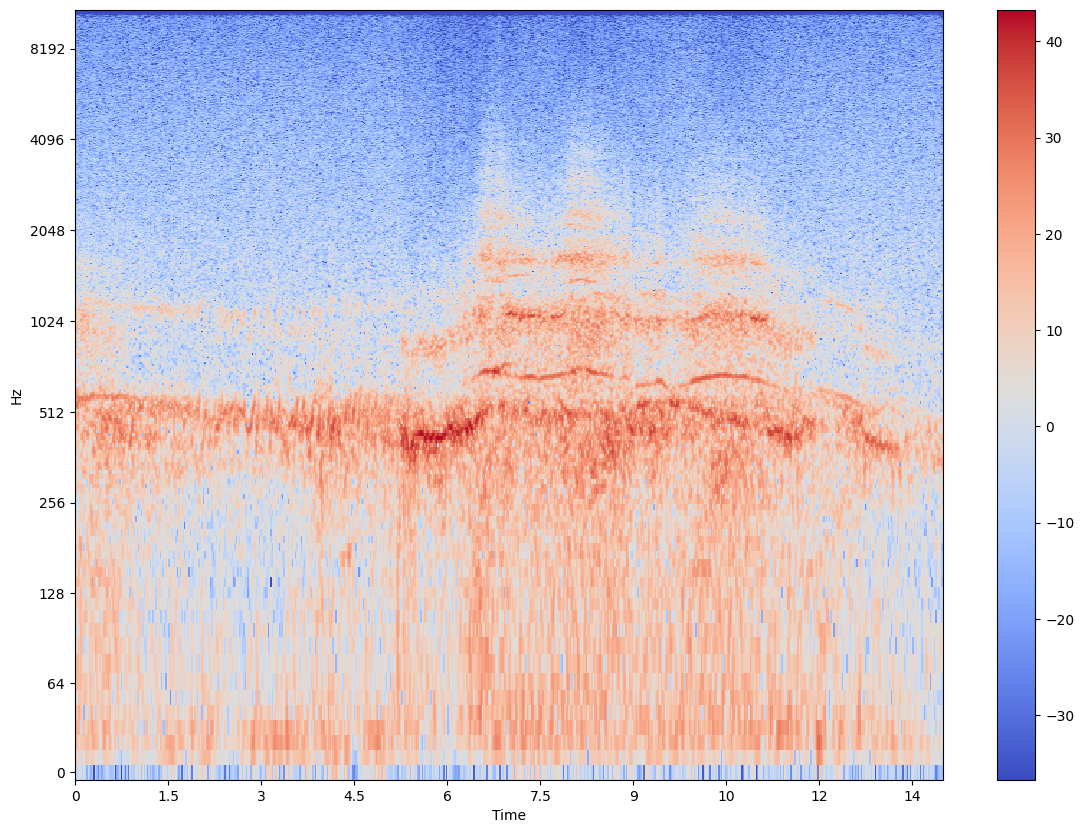

In [40]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [41]:
X

array([[-3.14106494e-02+0.00000000e+00j,  7.10177183e-01+0.00000000e+00j,
        -8.98013949e-01+0.00000000e+00j, ...,
        -2.33582199e-01+0.00000000e+00j,  4.20253932e-01+0.00000000e+00j,
        -2.43717015e-01+0.00000000e+00j],
       [ 1.18971848e+00-6.62700459e-02j, -1.89432204e+00+7.30793297e-01j,
         1.27995324e+00-2.44230700e+00j, ...,
         1.12391281e+00+1.35685492e+00j, -1.36244369e+00-6.84960961e-01j,
         8.95623624e-01-3.33415456e-02j],
       [-2.96130300e-01+2.41824317e+00j,  4.17546368e+00-3.73773336e+00j,
        -3.38606834e+00+4.09136206e-01j, ...,
        -1.89292741e+00-2.57773519e+00j,  1.43741632e+00+1.67227197e+00j,
        -1.17564297e+00-6.92782104e-01j],
       ...,
       [ 2.17244160e-05+3.33991666e-05j, -1.98143189e-05-1.65891470e-05j,
        -1.30873616e-06+5.42596240e-07j, ...,
        -5.64250797e-07+1.56724013e-07j,  9.74043473e-07-3.53600285e-07j,
         1.15291768e-04-2.46673771e-05j],
       [-2.18404275e-05-1.67098206e-05j, -8.

In [42]:
Xdb

array([[-30.058462  ,  -2.972666  ,  -0.9343385 , ..., -12.631206  ,
         -7.529764  , -12.262282  ],
       [  1.5223385 ,   6.1516232 ,   8.809933  , ...,   4.919546  ,
          3.665022  ,  -0.95147556],
       [  7.734641  ,  14.970008  ,  10.656862  , ...,  10.097861  ,
          6.868739  ,   2.6999917 ],
       ...,
       [-36.70259   , -36.70259   , -36.70259   , ..., -36.70259   ,
        -36.70259   , -36.70259   ],
       [-36.70259   , -36.70259   , -36.70259   , ..., -36.70259   ,
        -36.70259   , -36.70259   ],
       [-36.70259   , -36.70259   , -36.70259   , ..., -36.70259   ,
        -36.70259   , -36.70259   ]], dtype=float32)

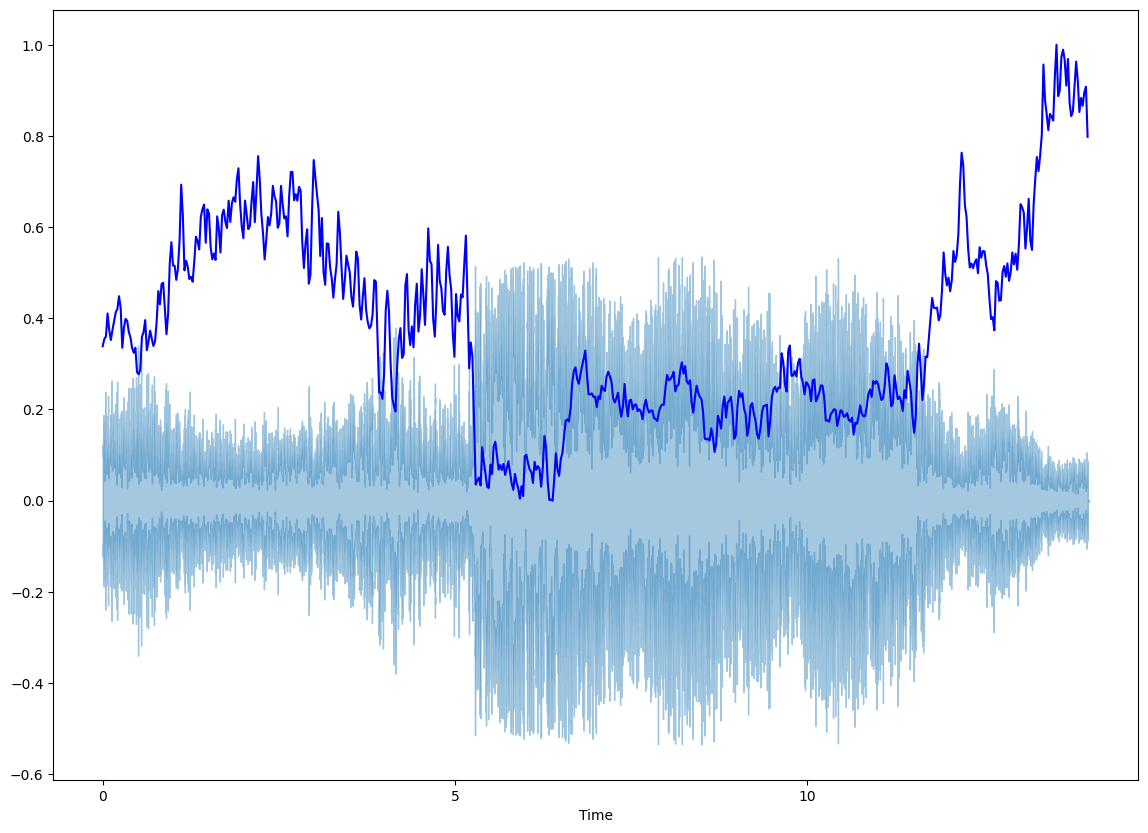

In [43]:
# Spectral Centroid
import sklearn
from sklearn import preprocessing

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

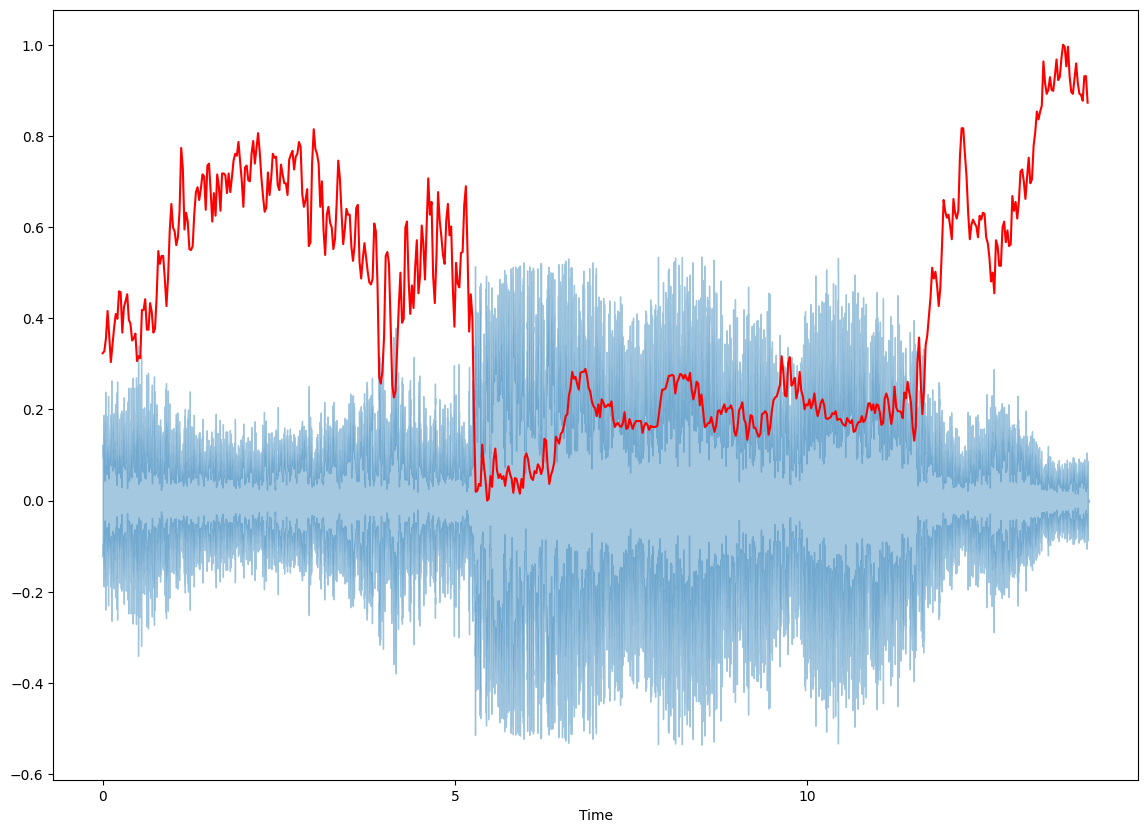

In [44]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

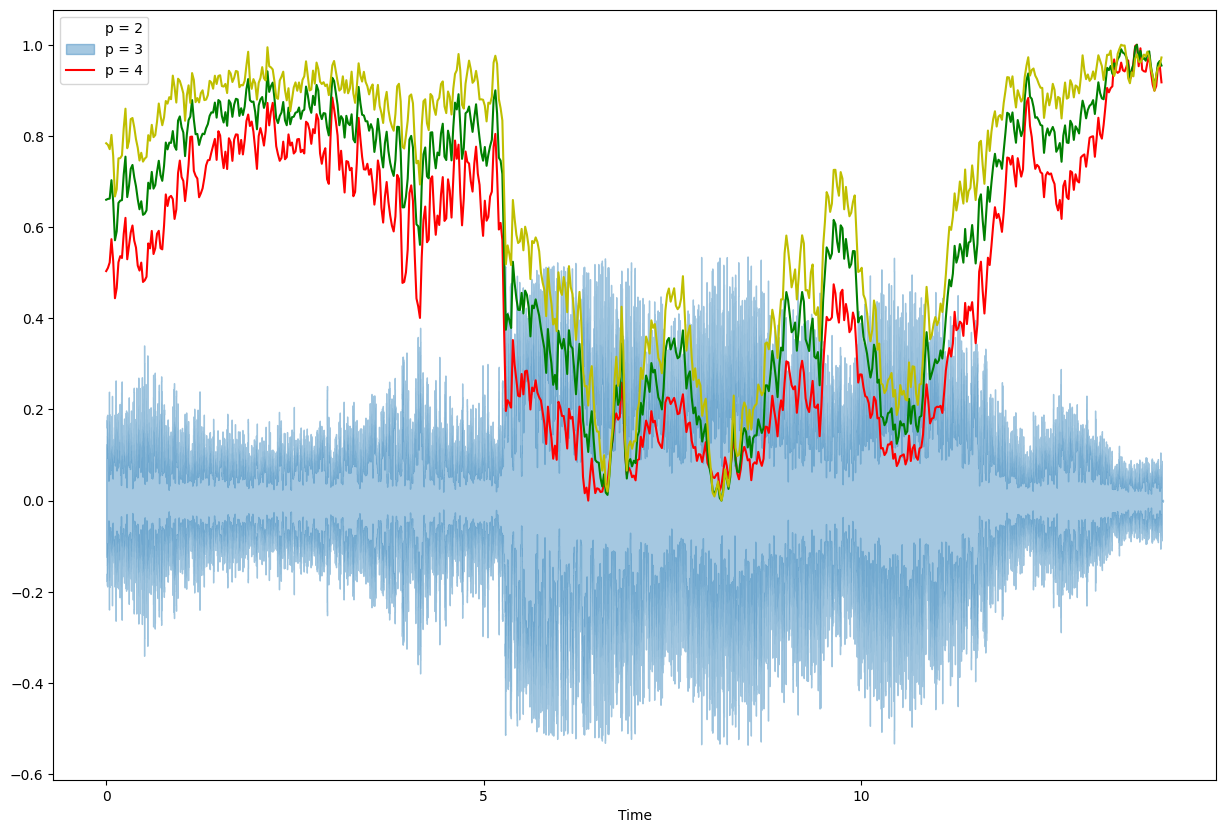

In [45]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

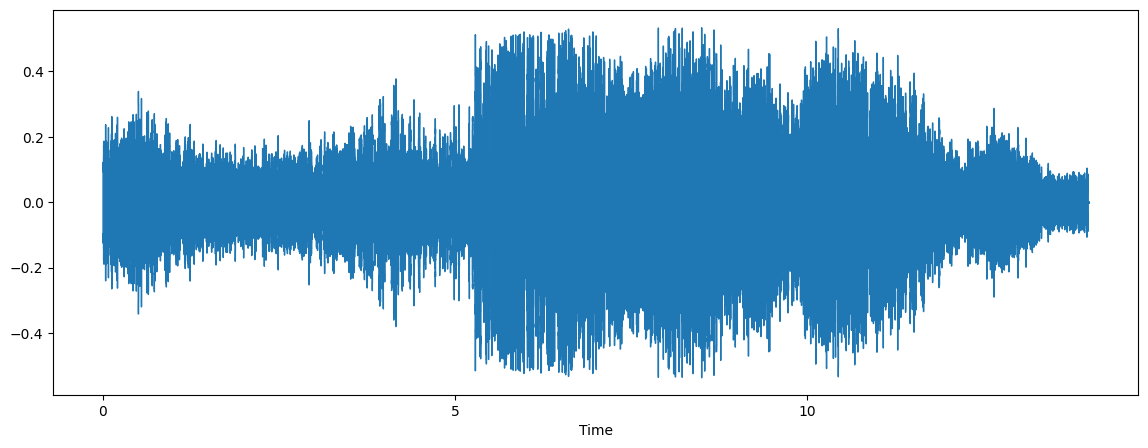

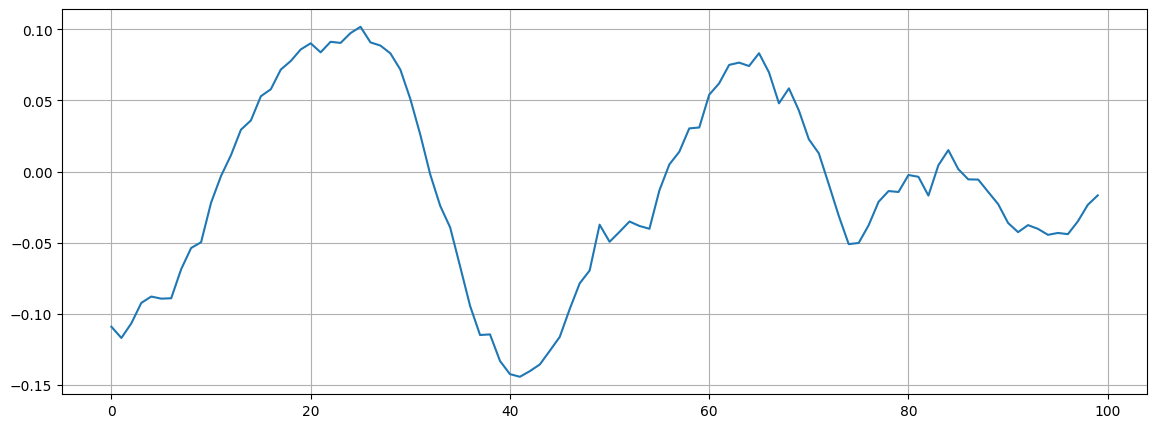

In [46]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [47]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


(20, 603)


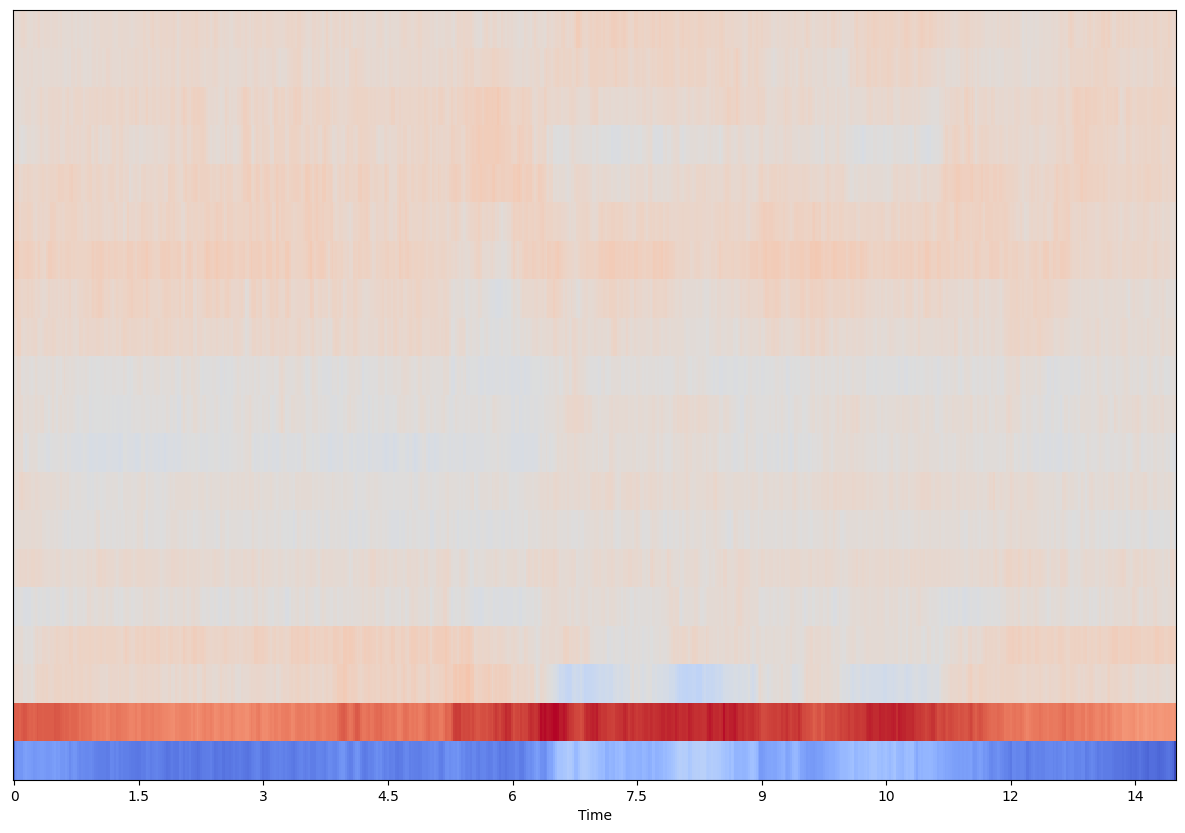

In [48]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')